<a href="https://colab.research.google.com/github/amandassa/ciencia-de-dados-aulas/blob/main/Arvore_e_Floresta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importes de Bibliotecas

In [ ]:
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Base de dados

In [ ]:
caso1 = { 'preco': [38, 42, 50, 56, 59, 63, 70, 80, 95, 110],
         'demanda': [350, 325, 297, 270, 256, 246, 238, 223, 215, 208]}

df_estudo_1 = pd.DataFrame(caso1)

df_estudo_1.sample(4)


,preco,demanda
0,38,350
6,70,238
5,63,246
3,56,270


In [ ]:
caso2 = {'preco': [38, 42, 50, 56, 59, 63, 70, 80, 95, 110],
         'demanda': [350, 325, 297, 270, 256, 246, 238, 223, 215, 208],
         'Publicidade': [100, 120, 80, 90, 110, 95, 70, 85, 75, 60],
         'Competidores': [5, 4, 6, 3, 5, 4, 6, 3, 4, 5]}

df_estudo_2 = pd.DataFrame(caso2)

df_estudo_2.sample(4)


,preco,demanda,Publicidade,Competidores
7,80,223,85,3
3,56,270,90,3
8,95,215,75,4
4,59,256,110,5


#Modelagem

In [ ]:
X = df_estudo_1[['preco']]
y = df_estudo_1['demanda']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do modelo de árvore de regressão
regressor = DecisionTreeRegressor()

# Ajustar o modelo aos dados de treinamento
regressor.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir as métricas
print("MSE:", mse)
print("R²:", r2)

MSE: 344.5
R²: 0.8861157024793388


In [ ]:
df_estudo_1['demanda_predita'] = regressor.predict(X)
df_estudo_1['erro_arvore'] = abs(df_estudo_1['demanda_predita'] - df_estudo_1['demanda'])
df_estudo_1

,preco,demanda,demanda_predita,erro_arvore
0,38,350,350.0,0.0
1,42,325,350.0,25.0
2,50,297,297.0,0.0
3,56,270,270.0,0.0
4,59,256,256.0,0.0
5,63,246,246.0,0.0
6,70,238,238.0,0.0
7,80,223,223.0,0.0
8,95,215,223.0,8.0
9,110,208,208.0,0.0


#Gráfico

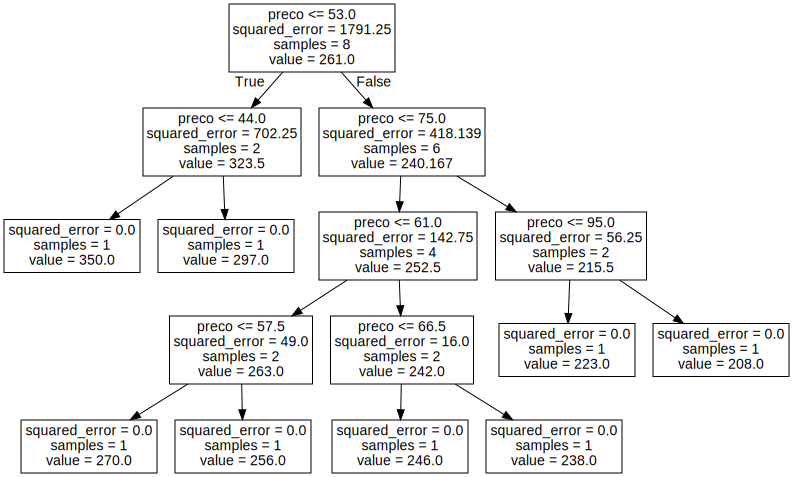

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Imprimir a árvore de decisão
dot_data = export_graphviz(regressor, out_file=None, feature_names= X.columns)
graph = graphviz.Source(dot_data)
graph.render("arvore_de_decisao")

# Exibir a árvore de decisão
graph

#Floresta Aleatória

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_estudo_1[['preco']]
y = df_estudo_1['demanda']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do modelo de floresta aleatória
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar o modelo aos dados de treinamento
regressor.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir o MSE
print("MSE:", mse)
print("R²:", r2)

In [ ]:
# Selecionar uma árvore da floresta
tree = regressor.estimators_[10]

# Exportar a árvore em formato DOT
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns)
graph = graphviz.Source(dot_data)

# Exibir a árvore
graph